In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')

In [45]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Data Analysis

In [12]:
df.shape

(4340, 8)

In [13]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


The data is from 1992 till 2020

The Min and Max value of selling price and KM_driven are very far, causing distrub data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [17]:
df.duplicated().sum()

763

In [46]:
df.drop_duplicates(inplace= True)

In [47]:
df.duplicated().sum()

0

# Data Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


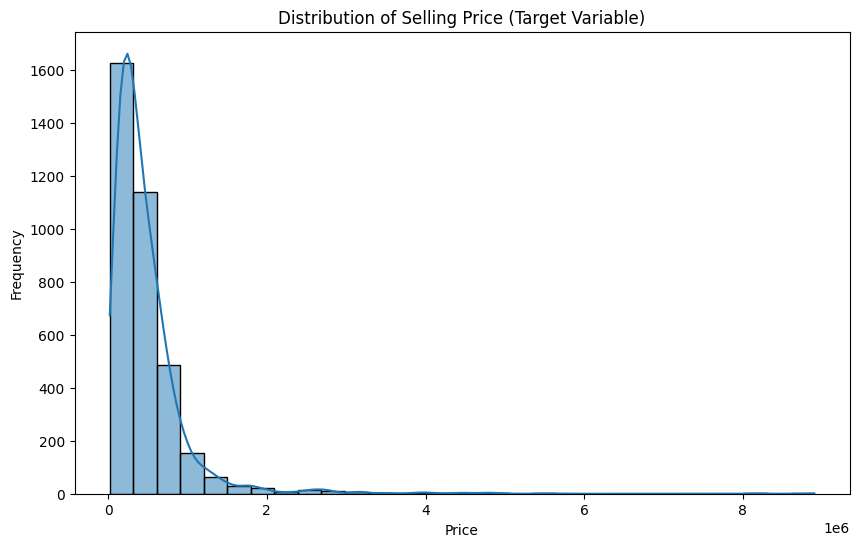


Skewness: 5.453918181903923
Kurtosis: 53.66410941808531


In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title("Distribution of Selling Price (Target Variable)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

print("\nSkewness:", df['selling_price'].skew())
print("Kurtosis:", df['selling_price'].kurtosis())

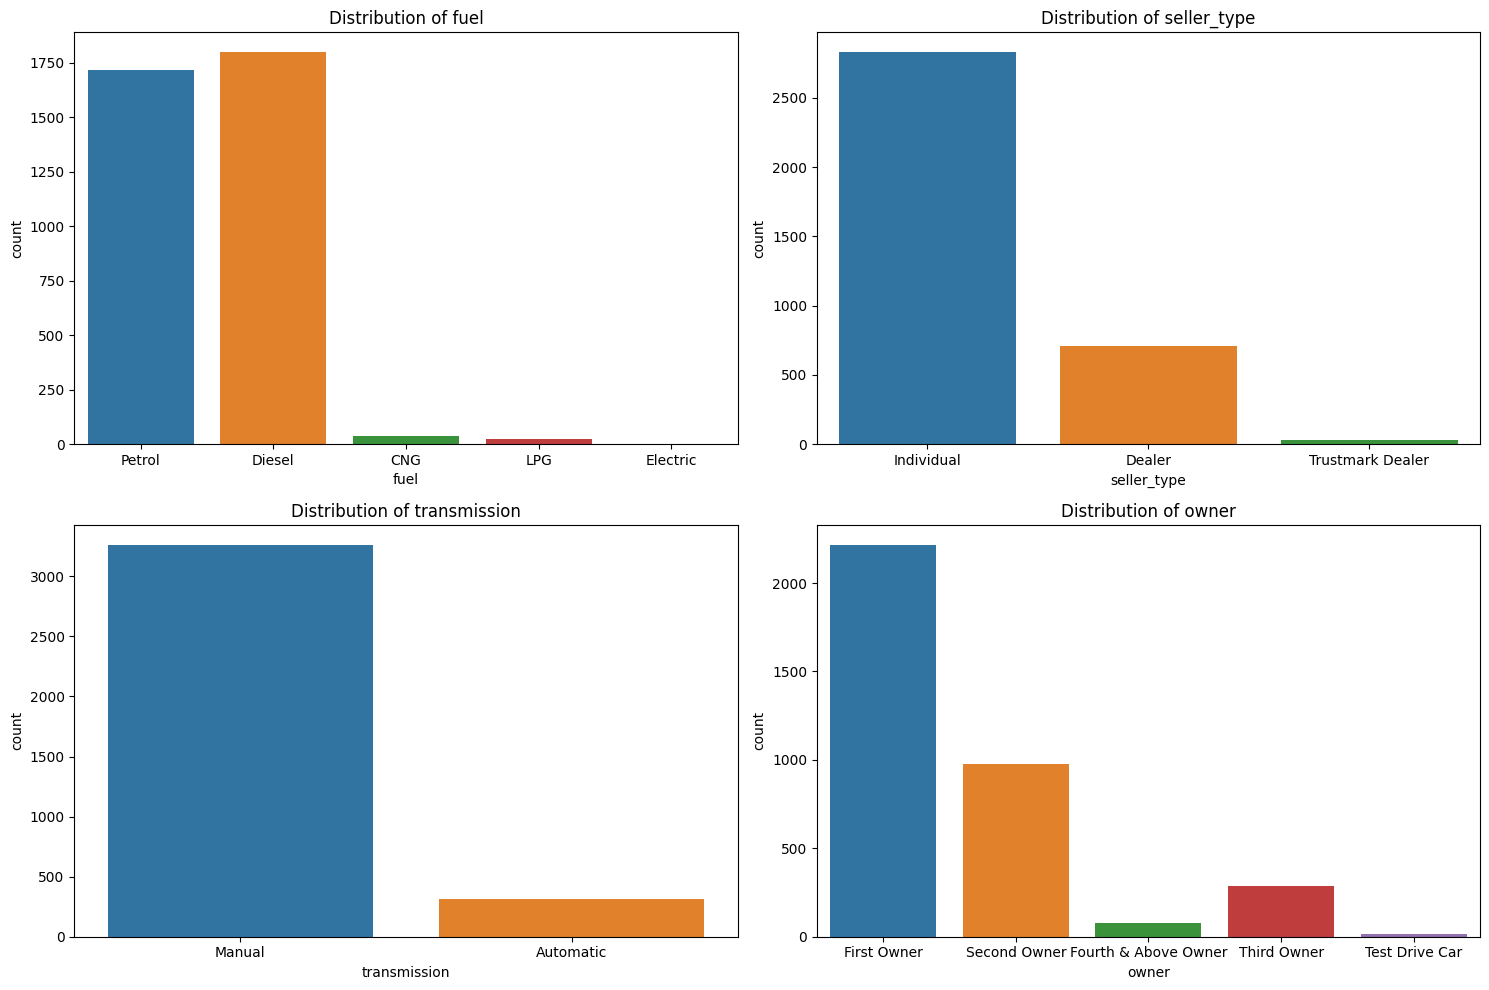

In [28]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


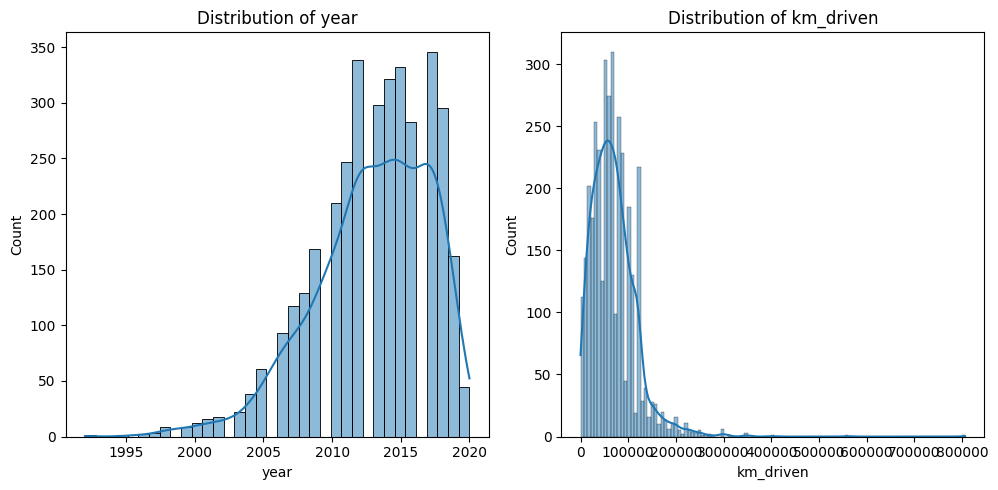

In [30]:
num_cols = ['year', 'km_driven']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


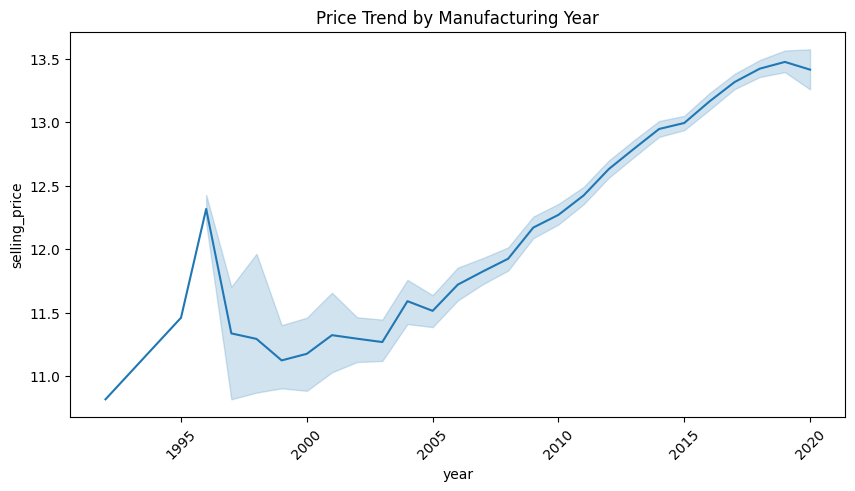

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['year'], y=np.log1p(df['selling_price']))
plt.xticks(rotation=45)
plt.title('Price Trend by Manufacturing Year')
plt.show()

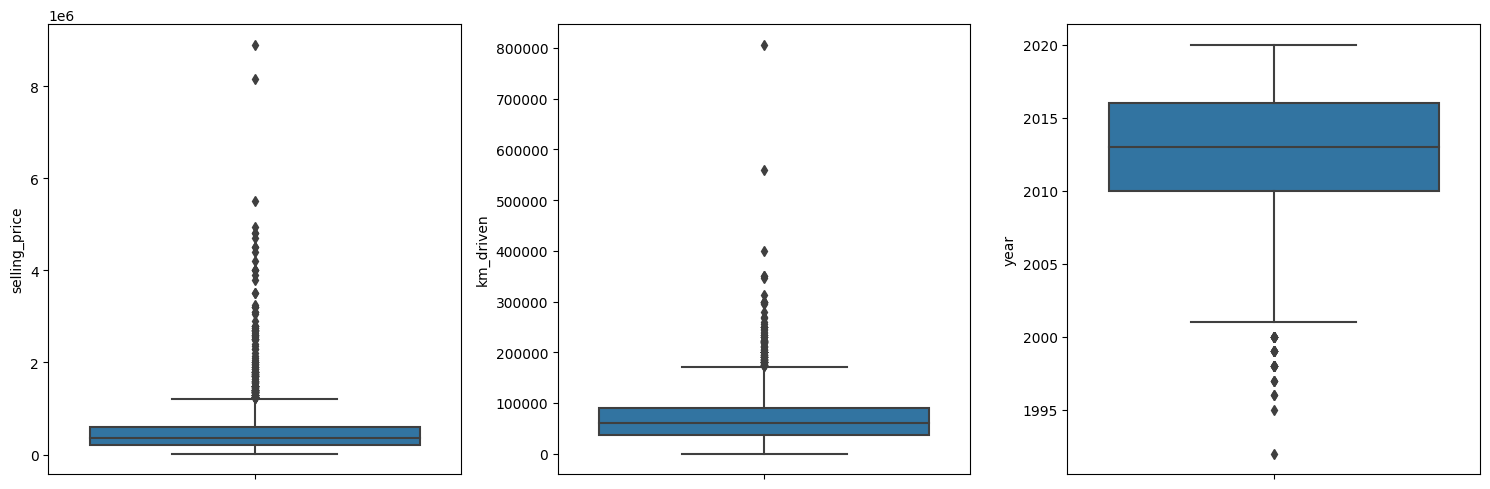

In [33]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(y=df['selling_price'], ax=axes[0])
sns.boxplot(y=df['km_driven'], ax=axes[1])
sns.boxplot(y=df['year'], ax=axes[2])
plt.tight_layout()
plt.show()

# Data Preprocessing

## Target Column

In [48]:
upper_limit = df['selling_price'].quantile(0.99)
df['selling_price'] = np.where(df['selling_price'] > upper_limit, upper_limit, df['selling_price'])

In [49]:
df['log_price'] = np.log1p(df['selling_price'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


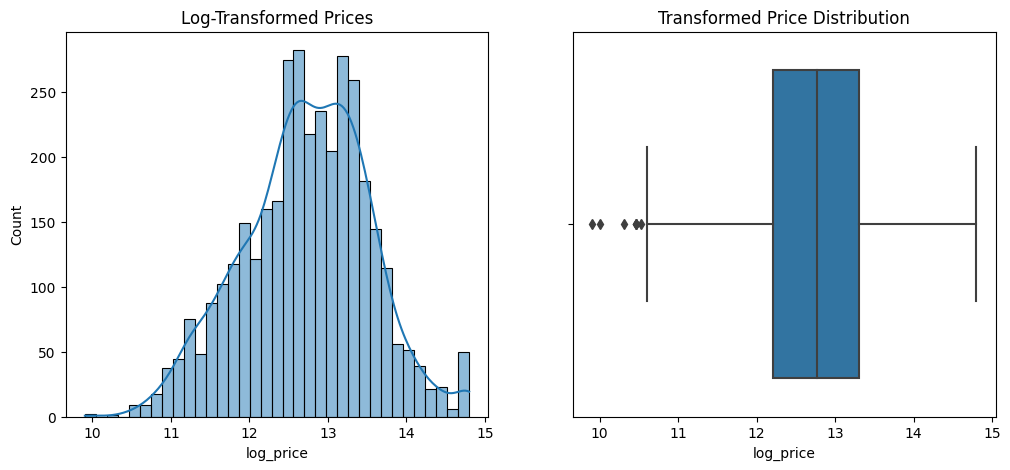

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['log_price'], kde=True)
plt.title('Log-Transformed Prices')

plt.subplot(1,2,2)
sns.boxplot(x=df['log_price'])
plt.title('Transformed Price Distribution')
plt.show()

The data is normally distributed now

# Feul Column

-> Group rare categories into 'Other

In [51]:
fuel_counts = df['fuel'].value_counts()
rare_fuels = fuel_counts[fuel_counts < 50].index
df['fuel_processed'] = df['fuel'].replace(rare_fuels, 'Other')

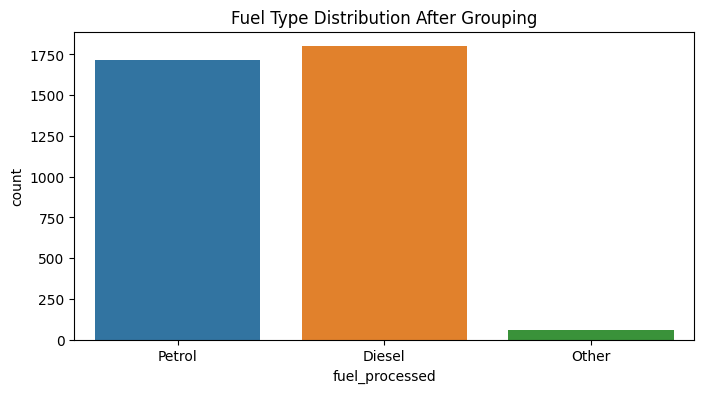

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='fuel_processed')
plt.title('Fuel Type Distribution After Grouping')
plt.show()

## Seller Type Column

Using Target Encoding, Calculate mean price per seller type (regularized)

In [52]:
global_mean = df['log_price'].mean()
seller_means = df.groupby('seller_type')['log_price'].mean()
counts = df['seller_type'].value_counts()

df['seller_type_encoded'] = df['seller_type'].map(
    lambda x: (seller_means[x]*counts[x] + global_mean*10) / (counts[x] + 10)
)

## Year Column

Convert to "Car Age" + Sigmoid Scaling

Step 1: Convert to age (more meaningful than raw year)

In [53]:
current_year = 2020
df['car_age'] = current_year - df['year']

Step 2: Sigmoid scaling (best for neural networks)

In [54]:
df['car_age_scaled'] = 1 / (1 + np.exp(-(df['car_age'] - df['car_age'].median())/10))

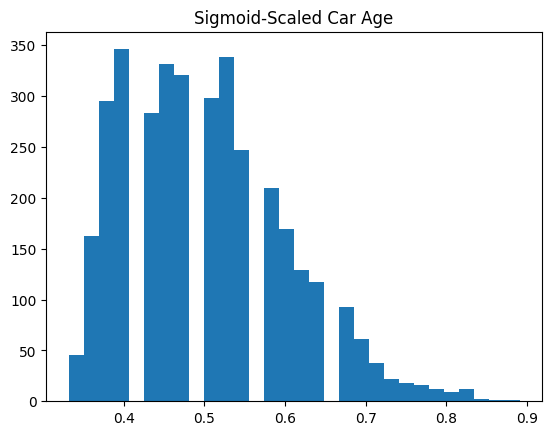

In [13]:
plt.hist(df['car_age_scaled'], bins=30)
plt.title("Sigmoid-Scaled Car Age")
plt.show()

## km_driven Column

Log Transformation + Robust Scaling

 Step 1: Log transform (handle skewness)

In [55]:
df['km_log'] = np.log1p(df['km_driven'])

Step 2: Robust scaling (immune to outliers)


In [56]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['km_scaled'] = scaler.fit_transform(df[['km_log']])

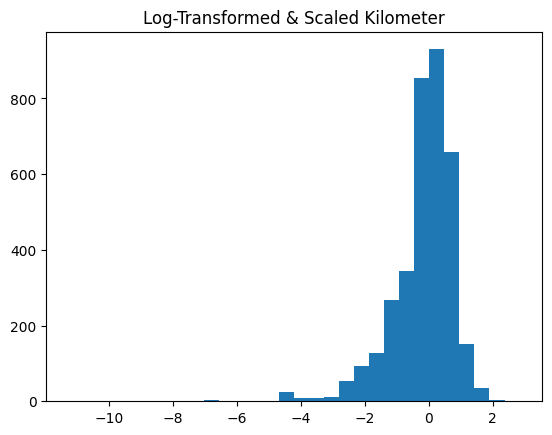

In [16]:
plt.hist(df['km_scaled'], bins=30)
plt.title("Log-Transformed & Scaled Kilometer")
plt.show()

In [57]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,log_price,fuel_processed,seller_type_encoded,car_age,car_age_scaled,km_log,km_scaled
0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,11.002117,Petrol,12.62808,13,0.645656,11.156265,0.168234
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,11.813037,Petrol,12.62808,13,0.645656,10.819798,-0.198978
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,13.304687,Diesel,12.62808,8,0.524979,11.512935,0.557496
3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,12.429220,Petrol,12.62808,3,0.401312,10.736418,-0.289977
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,13.017005,Diesel,12.62808,6,0.475021,11.856522,0.932478


# Drop columns that are either raw versions or no longer needed

In [58]:
columns_to_drop = [
    'name',                   # Unnecessary identifier
    'year',                   # Already converted to car_age
    'selling_price',          # Using log_price as target
    'km_driven',              # Using km_log and km_scaled
    'fuel',                   # Using fuel_processed
    'seller_type'             # Using seller_type_encoded
]

df_processed = df.drop(columns=columns_to_drop)

# List of categorical columns to convert to dummies

In [59]:
categorical_cols = [
    'transmission',
    'owner',
    'fuel_processed']

df_final = pd.get_dummies(df_processed, 
                         columns=categorical_cols,
                         drop_first=True)  

In [60]:
df_final.head()

,log_price,seller_type_encoded,car_age,car_age_scaled,km_log,km_scaled,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_processed_Other,fuel_processed_Petrol
0,11.002117,12.62808,13,0.645656,11.156265,0.168234,True,False,False,False,False,False,True
1,11.813037,12.62808,13,0.645656,10.819798,-0.198978,True,False,False,False,False,False,True
2,13.304687,12.62808,8,0.524979,11.512935,0.557496,True,False,False,False,False,False,False
3,12.429220,12.62808,3,0.401312,10.736418,-0.289977,True,False,False,False,False,False,True
4,13.017005,12.62808,6,0.475021,11.856522,0.932478,True,False,True,False,False,False,False


In [61]:
df_final.shape

(3577, 13)

In [62]:
df_final.columns

Index(['log_price', 'seller_type_encoded', 'car_age', 'car_age_scaled',
       'km_log', 'km_scaled', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_processed_Other',
       'fuel_processed_Petrol'],
      dtype='object')

# Splitting Data

In [63]:
X = df_final.drop(columns=['log_price'])
y = df_final['log_price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [70]:
model = keras.Sequential([
    layers.Dense(32, input_dim=X_train.shape[1], activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training Model

In [72]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 155.6176 - mae: 12.0187 - val_loss: 4.1289 - val_mae: 1.7423
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3623 - mae: 2.3925 - val_loss: 1.6152 - val_mae: 1.0102
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8000 - mae: 2.2102 - val_loss: 1.0049 - val_mae: 0.8071
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9031 - mae: 1.9260 - val_loss: 0.8306 - val_mae: 0.7134
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8832 - mae: 1.7431 - val_loss: 1.1153 - val_mae: 0.8278
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2223 - mae: 1.6511 - val_loss: 0.9825 - val_mae: 0.7723
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3747 - mae: 1.4603 - val_loss: 1.1954 - val_mae: 0.8796
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1662 - mae: 1.3935 - val_loss: 1.6324 - val_mae: 1.1005
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.

<Axes: >

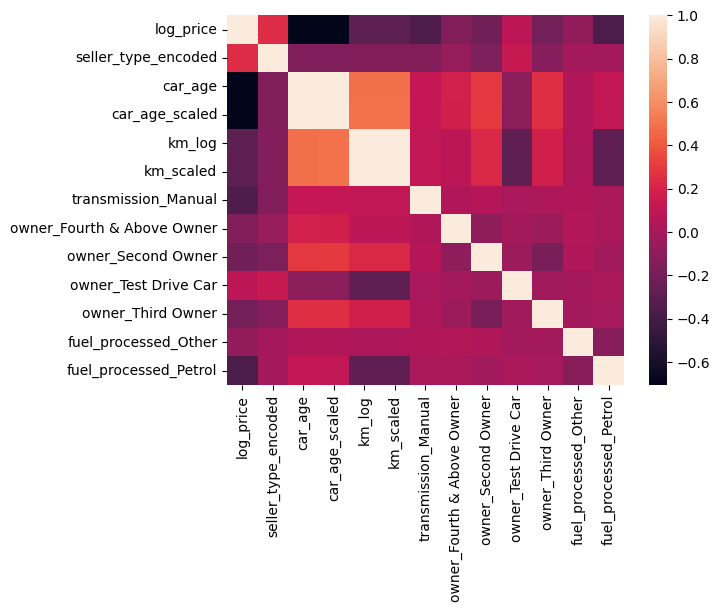

In [69]:
sns.heatmap(df_final.corr())

In [74]:
y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Actual Price RMSE: {rmse:.2f}")
print(f"Actual Price R² Score: {r2:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Actual Price RMSE: 544144.14
Actual Price R² Score: -0.7451


# Trying XGB BOOST 

In [75]:
import xgboost as xgb


In [76]:
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)

In [77]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
y_pred = model.predict(X_test).flatten()

In [83]:
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)

In [84]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.4f}")

XGBoost RMSE: 256504.72
XGBoost R² Score: 0.6122
